In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regression Loss Functions

## Mean Square Error (MSE/ L2 Loss)

In [4]:
def getMSE(target, predicted):
    """
    target: Array of target values
    predicted: Array of predicted values
    
    returns: Mean Square Error Loss
    """

    return (target - predicted) ** 2

Total MSE Loss: 3333343534.0


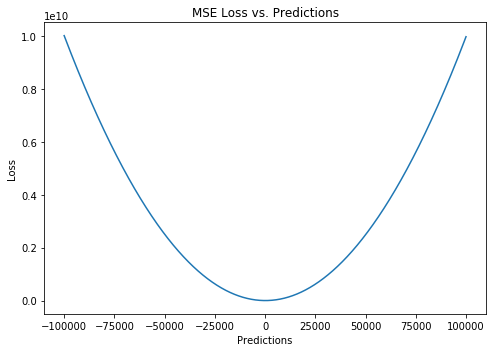

In [5]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(100, 100000)

# array of predicted value from -100000 to 99995
predicted = np.arange(-100000,100000, 2)

mse_loss = getMSE(target, predicted)

total_mse_loss = np.mean(mse_loss)
print("Total MSE Loss: {}".format(total_mse_loss))

# plot 
ax1.plot(predicted, mse_loss)
ax1.set_xlabel("Predictions")
ax1.set_ylabel("Loss")
ax1.set_title("MSE Loss vs. Predictions")

fig.tight_layout()

## Mean Absolute Error (MAE/ L1 loss)

In [6]:
def getMAE(target, predicted):
    """
    target: Array of target values
    predicted: Array of predicted values
    
    returns: Mean Absolute Error Loss
    """
    
    return np.abs(target - predicted)

Total MAE Loss: 50000.051


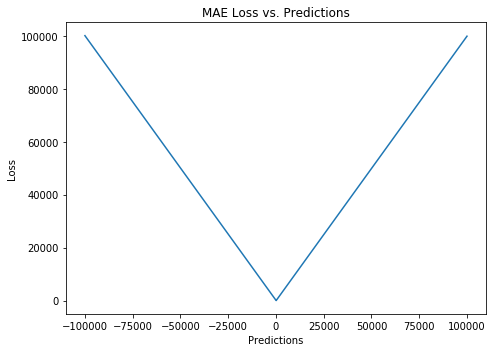

In [7]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(100, 100000)

# array of predicted value from -100000 to 99995
predicted = np.arange(-100000,100000, 2)

mae_loss = getMAE(target, predicted)

total_mae_loss = np.mean(mae_loss)
print("Total MAE Loss: {}".format(total_mae_loss))

# plot 
ax1.plot(predicted, mae_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MAE Loss vs. Predictions")

fig.tight_layout()

## Huber Loss

In [8]:
def getHuberLoss(target, predicted, delta):
    """
    target: Array of target values
    predicted: Array of predicted values
    delta: Hyperparameter i.e. MAE when 𝛿 ~ 0 and MSE when 𝛿 ~ ∞
    
    returns: Huber loss / smooth mean absolute error loss
    """
    
    return np.where(np.abs(target - predicted) < delta , 
                    0.5 * ((target - predicted) ** 2),
                    delta * np.abs(target - predicted) - 0.5 * (delta ** 2))

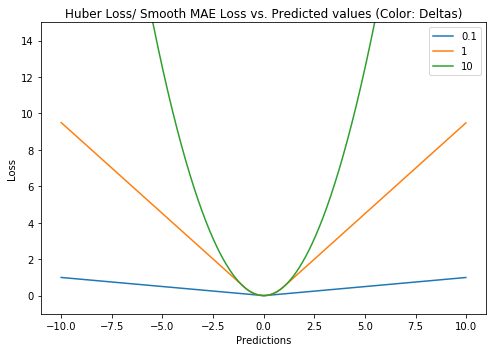

In [9]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(0, 1000)

# array of predicted value from -100000 to 99995
predicted = np.arange(-10,10, 0.02)

delta = [0.1, 1, 10]

sm_mae_loss = [getHuberLoss(target, predicted, delta[x]) for x in range(len(delta))]

# plot 
for x in range(len(delta)):
    ax1.plot(predicted, sm_mae_loss[x], label = delta[x])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Huber Loss/ Smooth MAE Loss vs. Predicted values (Color: Deltas)")
ax1.legend()
ax1.set_ylim(bottom=-1, top = 15)

fig.tight_layout()

## Log cosh loss

In [10]:
def getLogCosh(target, predicted):
    """
    target: Array of target values
    predicted: Array of predicted values
    
    returns: Log Cosh Loss
    """
    
    return np.log(np.cosh(predicted - target))

Total Log-Cosh Loss: 4.347979504341417


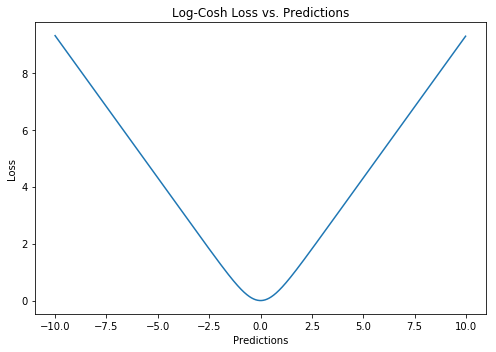

In [11]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(0, 1000) 
# array of predicted value from -100000 to 99995
predicted = np.arange(-10,10, 0.02)

logcosh_loss = getLogCosh(target, predicted)
total_logcosh_loss = np.mean(logcosh_loss)
print("Total Log-Cosh Loss: {}".format(total_logcosh_loss))

# plot 
ax1.plot(predicted, logcosh_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Log-Cosh Loss vs. Predictions")

fig.tight_layout()

## Quantile loss

In [12]:
def getQuantile(target, predicted, theta):
    """
    target: Array of target values
    predicted: Array of predicted values
    theta: Hyperparameter i.e. lesser value gives more penalty to overestimation, [0, 1]
    
    returns: Quantile loss
    """
    return np.where(target >= predicted,
                    theta * (np.abs(target - predicted)),
                    (1-theta) * (np.abs(target - predicted)))

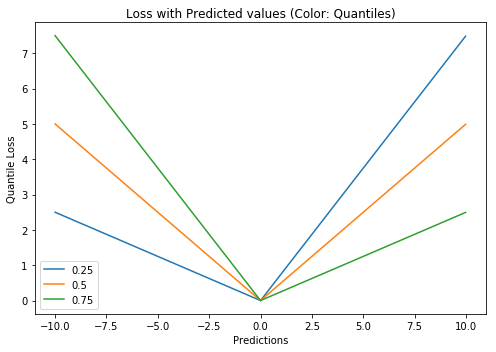

In [13]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(0, 1000) 
# array of predicted value from -100000 to 99995
predicted = np.arange(-10,10, 0.02)

quantiles = [0.25, 0.5, 0.75]

quan_loss = [getQuantile(target, predicted, q) for q in quantiles]

# plot 
for i in range(len(quantiles)):
    ax1.plot(predicted, quan_loss[i], label = quantiles[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Quantile Loss')
ax1.set_title("Loss with Predicted values (Color: Quantiles)")
ax1.legend()

fig.tight_layout()

# Classification Loss Functions

## Log Loss or Binary Cross Entropy or Negative Log Liklihood

In [14]:
def getLogLoss(true_label, predicted, eps=1e-15):
    p = np.clip(predicted, eps, 1 - eps)
    if true_label == 1:
        return -np.log(p)
    else:
        return -np.log(1 - p)

Total Log Loss: 1.0029014659342386


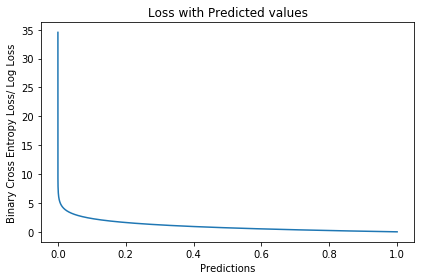

In [15]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
log_loss_ce = [getLogLoss(target[i], pred[i]) for i in range(len(pred))]

total_log_loss_ce = np.mean(log_loss_ce)
print("Total Log Loss: {}".format(total_log_loss_ce))

# plot for binary cross entropy
ax1.plot(pred, log_loss_ce)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Binary Cross Entropy Loss/ Log Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

## Focal Loss

In [16]:
def getFocalLoss(true, pred, gamma, eps=1e-15):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: binary cross entropy loss
    """
    p = np.clip(pred, eps, 1 - eps)
    return -np.where(true==1, (1-p)**gamma*(np.log(p)), p**gamma*(np.log(1-p)))

Total Focal Loss: 1.0029014659342386 for gamma: 0
Total Focal Loss: 0.8564830084609586 for gamma: 0.5
Total Focal Loss: 0.7529014760970668 for gamma: 1
Total Focal Loss: 0.6140125965376425 for gamma: 2
Total Focal Loss: 0.41123484674807587 for gamma: 5


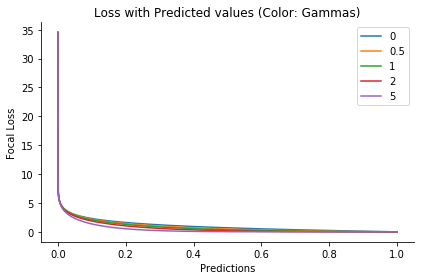

In [17]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
gammas = [0, 0.5, 1, 2, 5]
focal_loss = [[getFocalLoss(target[i], pred[i], gamma) for i in range(len(pred))] for gamma in gammas]

# Total focal loss
for x in range(len(gammas)):
    total_log_loss_ce = np.mean(focal_loss[x])
    print("Total Focal Loss: {0} for gamma: {1}".format(total_log_loss_ce, gammas[x]))

# plot for binary cross entropy
for i in range(len(gammas)):
    ax1.plot(pred, focal_loss[i], label = gammas[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Focal Loss')
ax1.set_title("Loss with Predicted values (Color: Gammas)")
ax1.legend()

# make right and top lines invisible
ax1.spines['top'].set_visible(False)    # Make the top axis line for a plot invisible
ax1.spines['right'].set_visible(False) # Make the right axis line for a plot invisible

fig.tight_layout()

## Hinge Loss

In [18]:
def hinge(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: hinge loss
    """
    return np.max((0, (1 - pred*true)))

Total Hinge Loss: 0.5000499999999999


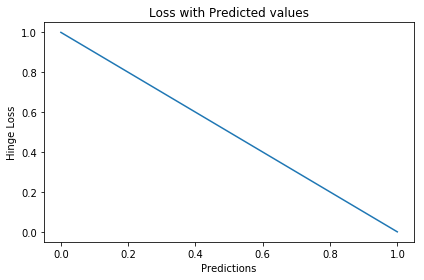

In [20]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
hinge_loss = [hinge(target[i], pred[i]) for i in range(len(pred))]

total_hinge_loss = np.mean(hinge_loss)
print("Total Hinge Loss: {0}".format(total_hinge_loss))

# plot for hinge
ax1.plot(pred, hinge_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Hinge Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

## Square Loss

In [22]:
def sq_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: square loss
    """
    return (1 - pred*true)**2

Total Square Loss: 0.333383335


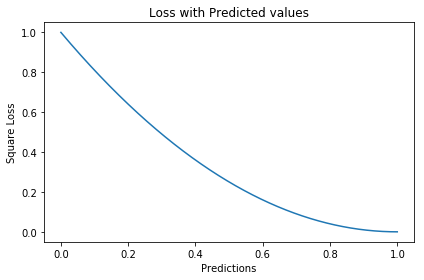

In [23]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_sq = [sq_loss(target[i], pred[i]) for i in range(len(pred))]

total_square_loss = np.mean(loss_sq)
print("Total Square Loss: {0}".format(total_square_loss))

# plot for hinge
ax1.plot(pred, loss_sq)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Square Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

## Logistic Loss

In [24]:
def log_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: logistic loss
    """
    return np.log(1 + np.exp(-(pred*true)))/np.log(2)

Total Logistic Loss: 0.6980307286210167


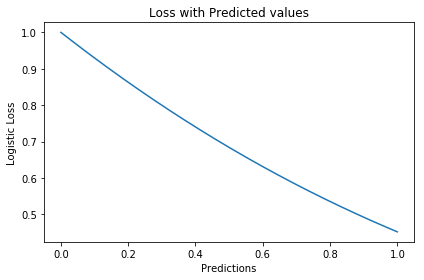

In [35]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
log_loss = [log_loss(target[i], pred[i]) for i in range(len(pred))]

total_logistic_loss = np.mean(log_loss)
print("Total Logistic Loss: {0}".format(total_logistic_loss))

# plot for hinge
ax1.plot(pred, loss_log_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Logistic Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

## Exponential loss

In [28]:
def expo(true, pred, beta):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: logistic loss
    """
    return np.exp(-(beta*pred*true))

Total Exponential Loss: 0.333383335


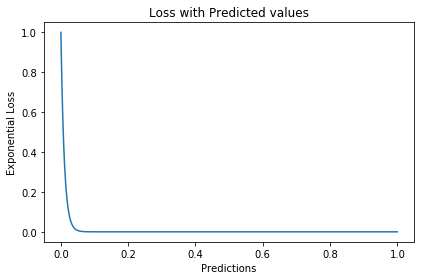

In [29]:
fig, ax1 = plt.subplots()

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_exp = [expo(target[i], pred[i], 100) for i in range(len(pred))]

total_expo_loss = np.mean(loss_sq)
print("Total Exponential Loss: {0}".format(total_expo_loss))

# plot for exponential loss
ax1.plot(pred, loss_exp)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Exponential Loss')
ax1.set_title("Loss with Predicted values")
fig.tight_layout()

## Kullback–Leibler divergence

In [32]:
def kld(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: KL divergence loss
    """
    return pred*(np.log(pred) - true)

Total KLD Loss: nan


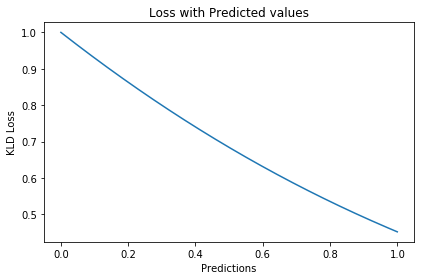

In [36]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
kld_loss = [kld(target[i], pred[i]) for i in range(len(pred))]

total_kld_loss = np.mean(kld_loss)
print("Total KLD Loss: {0}".format(total_kld_loss))

# plot for hinge
ax1.plot(pred, loss_log_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('KLD Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()